### Source of data: https://www.kaggle.com/datasets/komalkhetlani/imdb-dataset?resource=download

### Aim of this notebook is to analyze IMDB dataset of movies. It's purely to find interesting patterns and insights about movie trends.

In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

In [8]:
df1 = pd.read_csv('ImdbName.csv')
df2 = pd.read_csv('ImdbTitleAkas.csv')
df3 = pd.read_csv('ImdbTitleBasics.csv')
df4 = pd.read_csv('ImdbTitleCrew.csv')
# df5 = pd.read_csv('ImdbTitleEpisode.csv')
df6 = pd.read_csv('ImdbTitlePrincipals.csv')
df7 = pd.read_csv('ImdbTitleRatings.csv')

/var/folders/6g/fytkkjps4bv8kzynbpd83_x80000gn/T/ipykernel_38470/3229236374.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('ImdbTitleAkas.csv')
/var/folders/6g/fytkkjps4bv8kzynbpd83_x80000gn/T/ipykernel_38470/3229236374.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('ImdbTitleBasics.csv')


In [204]:
print(df1.shape, df2.shape, df3.shape, df4.shape, df6.shape, df7.shape)

(1048575, 6) (1048575, 8) (1048575, 9) (1048575, 3) (1048575, 6) (1048575, 3)


In [205]:
df = pd.concat([df1, df2, df3, df4, df6, df7], axis=1)
df.shape

(1048575, 35)

In [206]:
df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,titleId,ordering,title,region,...,writers,tconst,ordering,nconst,category,job,characters,tconst,averageRating,numVotes
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0050419,tt0072308",tt0000001,1,Карменсіта,UA,...,\N,tt0000001,1,nm1588970,self,\N,"[""Self""]",tt0000001,5.6,1694
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0071877,tt0038355,tt0037382",tt0000001,2,Carmencita,DE,...,\N,tt0000001,2,nm0005690,director,\N,\N,tt0000002,6.0,210
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0056404,tt0049189",tt0000001,3,Carmencita - spanyol tánc,HU,...,\N,tt0000001,3,nm0374658,cinematographer,director of photography,\N,tt0000003,6.5,1441
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0077975,tt0072562,tt0078723",tt0000001,4,Καρμενσίτα,GR,...,\N,tt0000002,1,nm0721526,director,\N,\N,tt0000004,6.1,122
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0050976,tt0050986,tt0060827",tt0000001,5,Карменсита,RU,...,\N,tt0000002,2,nm1335271,composer,\N,\N,tt0000005,6.1,2240


In [207]:
df.columns

Index(['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession',
       'knownForTitles', 'titleId', 'ordering', 'title', 'region', 'language',
       'types', 'attributes', 'isOriginalTitle', 'tconst', 'titleType',
       'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres', 'tconst', 'directors', 'writers', 'tconst',
       'ordering', 'nconst', 'category', 'job', 'characters', 'tconst',
       'averageRating', 'numVotes'],
      dtype='object')

In [208]:
df.drop(['tconst', 'nconst', 'ordering', 'attributes', 'titleId', 'knownForTitles', 
         'isOriginalTitle', 'directors', 'writers', 'title', 'originalTitle'
        ], axis=1, inplace=True)


In [209]:
df.head()

,primaryName,birthYear,deathYear,primaryProfession,region,language,types,titleType,primaryTitle,isAdult,startYear,endYear,runtimeMinutes,genres,category,job,characters,averageRating,numVotes
0,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous",UA,\N,imdbDisplay,short,Carmencita,0,1894,\N,1,"Documentary,Short",self,\N,"[""Self""]",5.6,1694
1,Lauren Bacall,1924,2014,"actress,soundtrack",DE,\N,\N,short,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",director,\N,\N,6.0,210
2,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department",HU,\N,imdbDisplay,short,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",cinematographer,director of photography,\N,6.5,1441
3,John Belushi,1949,1982,"actor,soundtrack,writer",GR,\N,imdbDisplay,short,Un bon bock,0,1892,\N,12,"Animation,Short",director,\N,\N,6.1,122
4,Ingmar Bergman,1918,2007,"writer,director,actor",RU,\N,imdbDisplay,short,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",composer,\N,\N,6.1,2240


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   primaryName        1048575 non-null  object 
 1   birthYear          1048575 non-null  object 
 2   deathYear          1048575 non-null  object 
 3   primaryProfession  996826 non-null   object 
 4   region             1048575 non-null  object 
 5   language           1048575 non-null  object 
 6   types              1048575 non-null  object 
 7   titleType          1048575 non-null  object 
 8   primaryTitle       1048575 non-null  object 
 9   isAdult            1048575 non-null  int64  
 10  startYear          1048575 non-null  object 
 11  endYear            1048575 non-null  object 
 12  runtimeMinutes     1048575 non-null  object 
 13  genres             1048575 non-null  object 
 14  category           1048575 non-null  object 
 15  job                1048575 non-n

### primaryProfession column has some null values, since the rows with null values are very less, dropping those rows.

In [211]:
df[df.primaryProfession.isnull()].index

Int64Index([   2648,    3921,    4327,    5203,    7213,    7226,    7228,
               7233,    7237,    7238,
            ...
            1048517, 1048535, 1048542, 1048544, 1048545, 1048546, 1048548,
            1048551, 1048555, 1048560],
           dtype='int64', length=51749)

In [212]:
df.drop(df[df.primaryProfession.isnull()].index, axis=0, inplace=True)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996826 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   primaryName        996826 non-null  object 
 1   birthYear          996826 non-null  object 
 2   deathYear          996826 non-null  object 
 3   primaryProfession  996826 non-null  object 
 4   region             996826 non-null  object 
 5   language           996826 non-null  object 
 6   types              996826 non-null  object 
 7   titleType          996826 non-null  object 
 8   primaryTitle       996826 non-null  object 
 9   isAdult            996826 non-null  int64  
 10  startYear          996826 non-null  object 
 11  endYear            996826 non-null  object 
 12  runtimeMinutes     996826 non-null  object 
 13  genres             996826 non-null  object 
 14  category           996826 non-null  object 
 15  job                996826 non-null  object 
 16  c

### The most common things we look before watching a movie/series is the genre, so let's start the analysis from there.

In [214]:
df.genres

0                 Documentary,Short
1                   Animation,Short
2          Animation,Comedy,Romance
3                   Animation,Short
4                      Comedy,Short
                     ...           
1048570                  Reality-TV
1048571                   Talk-Show
1048572                 Documentary
1048573                 Drama,Short
1048574                       Music
Name: genres, Length: 996826, dtype: object

In [215]:
max(df.averageRating)

10.0

In [216]:
min(df.averageRating)

1.0

### The rating is out of 10

In [217]:
genre_df = df.set_index(['primaryName', 'birthYear', 'deathYear', 'primaryProfession', 'region',
       'language', 'types', 'titleType', 'primaryTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'category', 'job',
       'characters', 'averageRating', 'numVotes']).apply(lambda x: x.str.split(',').explode()).reset_index()

In [218]:
genre_df.head()

,primaryName,birthYear,deathYear,primaryProfession,region,language,types,titleType,primaryTitle,isAdult,startYear,endYear,runtimeMinutes,category,job,characters,averageRating,numVotes,genres
0,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous",UA,\N,imdbDisplay,short,Carmencita,0,1894,\N,1,self,\N,"[""Self""]",5.6,1694,Documentary
1,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous",UA,\N,imdbDisplay,short,Carmencita,0,1894,\N,1,self,\N,"[""Self""]",5.6,1694,Short
2,Lauren Bacall,1924,2014,"actress,soundtrack",DE,\N,\N,short,Le clown et ses chiens,0,1892,\N,5,director,\N,\N,6.0,210,Animation
3,Lauren Bacall,1924,2014,"actress,soundtrack",DE,\N,\N,short,Le clown et ses chiens,0,1892,\N,5,director,\N,\N,6.0,210,Short
4,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department",HU,\N,imdbDisplay,short,Pauvre Pierrot,0,1892,\N,4,cinematographer,director of photography,\N,6.5,1441,Animation


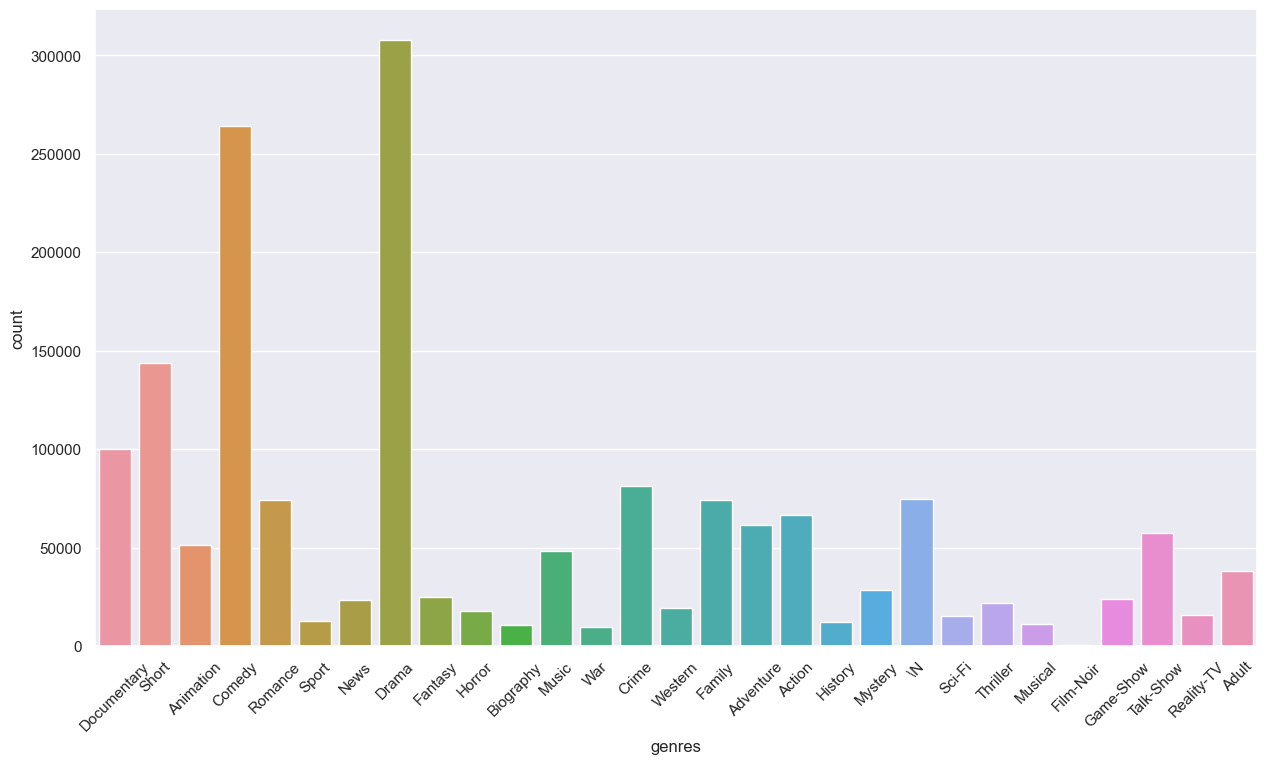

In [219]:
cp = sns.countplot(x=genre_df['genres'])
# cp.set(xticklabels=[])
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15,8.27)})
plt.show()

### We can observe that the dataset has the most movies with the genre Drama followed by comedy, with Biography, war, history and musicals having the least number of movies.

### Dropping the genres 'News', '\N', 'Film Noir', 'Game-Show', 'Talk-Show' and 'Reality-TV' from the dataset, because we are not interested in these

In [220]:
genre_df.drop(genre_df[((genre_df.genres=="News")|(genre_df.genres=="\\N")|(genre_df.genres=="Film-Noir")|
                       (genre_df.genres=="Game-Show")|(genre_df.genres=="Talk-Show")|(genre_df.genres=="Reality-TV")
                       )].index, axis=0, inplace=True)

In [221]:
avg_genre_ratings = genre_df[['genres', 'averageRating']].groupby('genres')['averageRating'].mean()

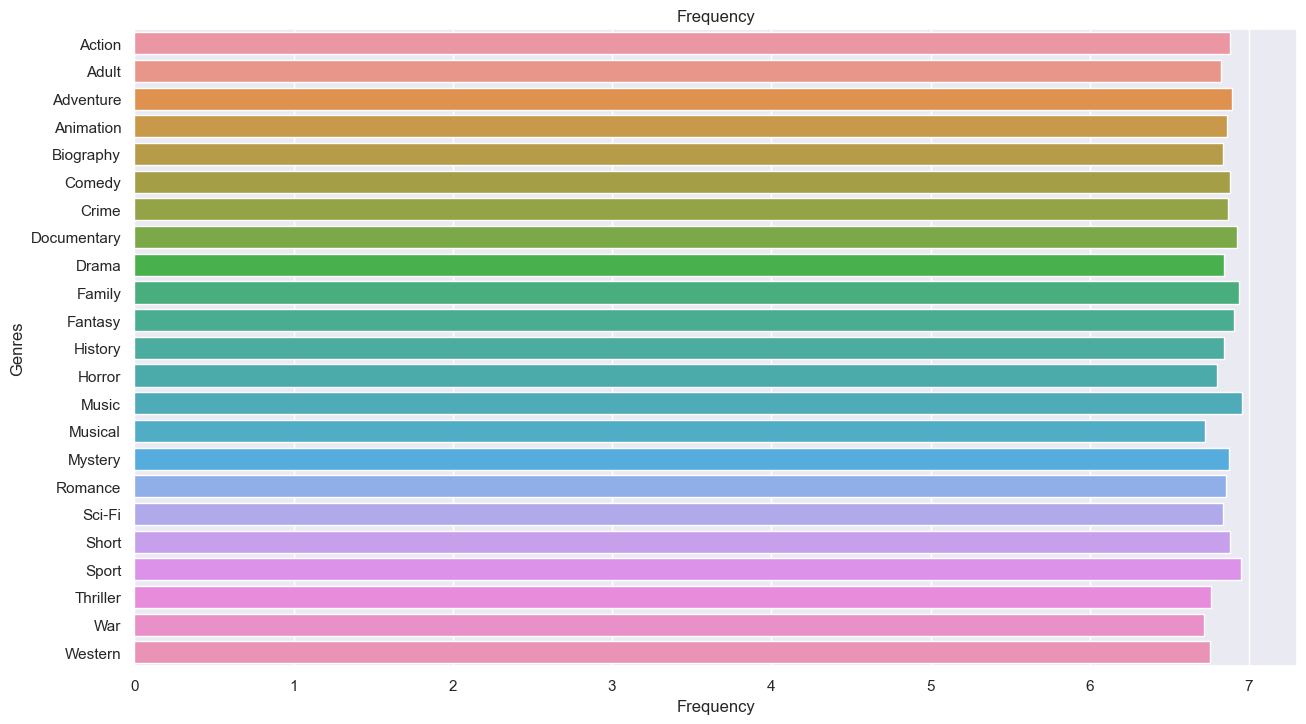

In [222]:
sns.barplot(x=avg_genre_ratings, y=avg_genre_ratings.index)
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.title('Frequency')
plt.grid(True, axis='x')
plt.show()

### We can observe that Music and Sport has the highest average rating

In [223]:
df.head()

,primaryName,birthYear,deathYear,primaryProfession,region,language,types,titleType,primaryTitle,isAdult,startYear,endYear,runtimeMinutes,genres,category,job,characters,averageRating,numVotes
0,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous",UA,\N,imdbDisplay,short,Carmencita,0,1894,\N,1,"Documentary,Short",self,\N,"[""Self""]",5.6,1694
1,Lauren Bacall,1924,2014,"actress,soundtrack",DE,\N,\N,short,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",director,\N,\N,6.0,210
2,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department",HU,\N,imdbDisplay,short,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",cinematographer,director of photography,\N,6.5,1441
3,John Belushi,1949,1982,"actor,soundtrack,writer",GR,\N,imdbDisplay,short,Un bon bock,0,1892,\N,12,"Animation,Short",director,\N,\N,6.1,122
4,Ingmar Bergman,1918,2007,"writer,director,actor",RU,\N,imdbDisplay,short,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",composer,\N,\N,6.1,2240


In [224]:
df.region.unique()

array(['UA', 'DE', 'HU', 'GR', 'RU', 'US', '\\N', 'JP', 'FR', 'RO', 'GB',
       'PT', 'RS', 'ES', 'UY', 'IT', 'AR', 'FI', 'PL', 'BR', 'DK', 'TR',
       'XWW', 'XEU', 'SK', 'CZ', 'SE', 'MX', 'NO', 'XYU', 'AT', 'VE',
       'CSHH', 'SI', 'AU', 'TW', 'LT', 'IN', 'CA', 'NL', 'CO', 'IR', 'BG',
       'BE', 'DZ', 'CH', 'NZ', 'BF', 'XWG', 'VN', 'XSA', 'SUHH', 'EE',
       'IS', 'HR', 'DDDE', 'HK', 'XKO', 'CL', 'PE', 'EG', 'GE', 'BY',
       'BA', 'PA', 'CN', 'TJ', 'YUCS', 'IE', 'IL', 'LV', 'CU', 'AL', 'BO',
       'ID', 'ZA', 'KR', 'UZ', 'MY', 'SG', 'BUMM', 'XPI', 'BJ', 'PR',
       'CM', 'AZ', 'TH', 'DO', 'EC', 'MA', 'PH', 'GL', 'MN', 'LI', 'LU',
       'PY', 'MZ', 'GT', 'BM', 'JM', 'MD', 'CR', 'LB', 'IQ', 'TM', 'MK',
       'TN', 'NG', 'HT', 'AM', 'SN', 'GH', 'CI', 'JO', 'KG', 'PK', 'LK',
       'KZ', 'NE', 'GN', 'VDVN', 'TD', 'SO', 'SD', 'MC', 'CG', 'TT', 'GA',
       'BS', 'LY', 'SY', 'AO', 'KH', 'SV', 'MR', 'AF', 'ML', 'GY', 'CY',
       'ET', 'GU', 'XAS', 'SR', 'MT', 'TG', 'PG', 'AE',

In [225]:
region_map = {'UA' : "Ukraine",
'DE' : "Germany",
'HU' : "Hungary",
'GR' : "Greece",
'RU' : "Russia",
'US' : "United States",
'\\N' : "Not applicable or unspecified",
'JP' : "Japan",
'FR' : "France",
'RO' : "Romania",
'GB' : "United Kingdom",
'PT' : "Portugal",
'RS' : "Serbia",
'ES' : "Spain",
'UY' : "Uruguay",
'IT' : "Italy",
'AR' : "Argentina",
'FI' : "Finland",
'PL' : "Poland",
'BR' : "Brazil",
'DK' : "Denmark",
'TR' : "Turkey",
'XWW' : "Worldwide",
'XEU' : "European Union",
'SK' : "Slovakia",
'CZ' : "Czech Republic",
'SE' : "Sweden",
'MX' : "Mexico",
'NO' : "Norway",
'XYU' : "Former Yugoslavia",
'AT' : "Austria",
'VE' : "Venezuela",
'CSHH' : "Czechoslovakia (historical)",
'SI' : "Slovenia",
'AU' : "Australia",
'TW' : "Taiwan",
'LT' : "Lithuania",
'IN' : "India",
'CA' : "Canada",
'NL' : "Netherlands",
'CO' : "Colombia",
'IR' : "Iran",
'BG' : "Bulgaria",
'BE' : "Belgium",
'DZ' : "Algeria",
'CH' : "Switzerland",
'NZ' : "New Zealand",
'BF' : "Burkina Faso",
'VN' : "Vietnam",
'XSA' : "Saudi Arabia",
'SUHH' : "Soviet Union (historical)",
'EE' : "Estonia",
'IS' : "Iceland",
'HR' : "Croatia",
'DDDE' : "East Germany (historical)",
'HK' : "Hong Kong",
'XKO' : "Kosovo",
'CL' : "Chile",
'PE' : "Peru",
'EG' : "Egypt",
'GE' : "Georgia",
'BY' : "Belarus",
'BA' : "Bosnia and Herzegovina",
'PA' : "Panama",
'CN' : "China",
'TJ' : "Tajikistan",
'YUCS' : "Yugoslavia (historical)",
'IE' : "Ireland",
'IL' : "Israel",
'LV' : "Latvia",
'CU' : "Cuba",
'AL' : "Albania",
'BO' : "Bolivia",
'ID' : "Indonesia",
'ZA' : "South Africa",
'KR' : "South Korea",
'UZ' : "Uzbekistan",
'MY' : "Malaysia",
'SG' : "Singapore",
'BUMM' : "Burma (historical)",
'XPI' : "Palestine",
'BJ' : "Benin",
'PR' : "Puerto Rico",
'CM' : "Cameroon",
'AZ' : "Azerbaijan",
'TH' : "Thailand",
'DO' : "Dominican Republic",
'EC' : "Ecuador",
'MA' : "Morocco",
'PH' : "Philippines",
'GL' : "Greenland",
'MN' : "Mongolia",
'LI' : "Liechtenstein",
'LU' : "Luxembourg",
'PY' : "Paraguay",
'MZ' : "Mozambique",
'GT' : "Guatemala",
'BM' : "Bermuda",
'JM' : "Jamaica",
'MD' : "Moldova",
'CR' : "Costa Rica",
'LB' : "Lebanon",
'IQ' : "Iraq",
'TM' : "Turkmenistan",
'MK' : "North Macedonia",
'TN' : "Tunisia",
'NG' : "Nigeria",
'HT' : "Haiti",
'AM' : "Armenia",
'SN' : "Senegal",
'GH' : "Ghana",
'CI' : "Côte d'Ivoire",
'JO' : "Jordan",
'KG' : "Kyrgyzstan",
'PK' : "Pakistan",
'LK' : "Sri Lanka",
'KZ' : "Kazakhstan",
'NE' : "Niger",
'GN' : "Guinea",
'VDVN' : "North Vietnam (historical)",
'TD' : "Chad",
'SO' : "Somalia",
'SD' : "Sudan",
'MC' : "Monaco",
'CG' : "Congo",
'TT' : "Trinidad and Tobago",
'GA' : "Gabon",
'BS' : "Bahamas",
'LY' : "Libya",
'SY' : "Syria",
'AO' : "Angola",
'KH' : "Cambodia",
'SV' : "El Salvador",
'MR' : "Mauritania",
'AF' : "Afghanistan",
'ML' : "Mali",
'GY' : "Guyana",
'CY' : "Cyprus",
'ET' : "Ethiopia",
'GU' : "Guam",
'XAS' : "South Asia (historical)",
'SR' : "Suriname",
'MT' : "Malta",
'TG' : "Togo",
'PG' : "Papua New Guinea",
'AE' : "United Arab Emirates",
'MU' : "Mauritius",
'BI' : "Burundi",
'CF' : "Central African Republic",
'NI' : "Nicaragua",
'ZW' : "Zimbabwe",
'BD' : "Bangladesh",
'ZM' : "Zambia",
'MG' : "Madagascar",
'GW' : "Guinea-Bissau",
'DJ' : "Djibouti",
'KP' : "North Korea",
'RW' : "Rwanda",
'TZ' : "Tanzania",
'GI' : "Gibraltar",
'LA' : "Laos",
'SC' : "Seychelles",
'NP' : "Nepal",
'GP' : "Guadeloupe",
'FO' : "Faroe Islands",
'PS' : "Palestine",
'ZRCD' : "Democratic Republic of the Congo (historical)",
'MO' : "Macau",
'AW' : "Aruba",
'KW' : "Kuwait",
'CV' : "Cape Verde",
'SL' : "Sierra Leone",
'CD' : "Democratic Republic of the Congo"}
df['RegioneName'] = df['region'].map(region_map)

In [226]:
df.drop(['region'], axis=1, inplace=True)

In [227]:
df.RegioneName.unique()

array(['Ukraine', 'Germany', 'Hungary', 'Greece', 'Russia',
       'United States', 'Not applicable or unspecified', 'Japan',
       'France', 'Romania', 'United Kingdom', 'Portugal', 'Serbia',
       'Spain', 'Uruguay', 'Italy', 'Argentina', 'Finland', 'Poland',
       'Brazil', 'Denmark', 'Turkey', 'Worldwide', 'European Union',
       'Slovakia', 'Czech Republic', 'Sweden', 'Mexico', 'Norway',
       'Former Yugoslavia', 'Austria', 'Venezuela',
       'Czechoslovakia (historical)', 'Slovenia', 'Australia', 'Taiwan',
       'Lithuania', 'India', 'Canada', 'Netherlands', 'Colombia', 'Iran',
       'Bulgaria', 'Belgium', 'Algeria', 'Switzerland', 'New Zealand',
       'Burkina Faso', nan, 'Vietnam', 'Saudi Arabia',
       'Soviet Union (historical)', 'Estonia', 'Iceland', 'Croatia',
       'East Germany (historical)', 'Hong Kong', 'Kosovo', 'Chile',
       'Peru', 'Egypt', 'Georgia', 'Belarus', 'Bosnia and Herzegovina',
       'Panama', 'China', 'Tajikistan', 'Yugoslavia (historical)',

In [228]:
df.head()

,primaryName,birthYear,deathYear,primaryProfession,language,types,titleType,primaryTitle,isAdult,startYear,endYear,runtimeMinutes,genres,category,job,characters,averageRating,numVotes,RegioneName
0,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous",\N,imdbDisplay,short,Carmencita,0,1894,\N,1,"Documentary,Short",self,\N,"[""Self""]",5.6,1694,Ukraine
1,Lauren Bacall,1924,2014,"actress,soundtrack",\N,\N,short,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",director,\N,\N,6.0,210,Germany
2,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department",\N,imdbDisplay,short,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",cinematographer,director of photography,\N,6.5,1441,Hungary
3,John Belushi,1949,1982,"actor,soundtrack,writer",\N,imdbDisplay,short,Un bon bock,0,1892,\N,12,"Animation,Short",director,\N,\N,6.1,122,Greece
4,Ingmar Bergman,1918,2007,"writer,director,actor",\N,imdbDisplay,short,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",composer,\N,\N,6.1,2240,Russia


In [229]:
df.primaryTitle.unique()

array(['Carmencita', 'Le clown et ses chiens', 'Pauvre Pierrot', ...,
       'Corey Hart', 'Fear of Dogs',
       'Wondercon Anaheim 2019 (Highlights)'], dtype=object)

In [230]:
df.titleType.unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

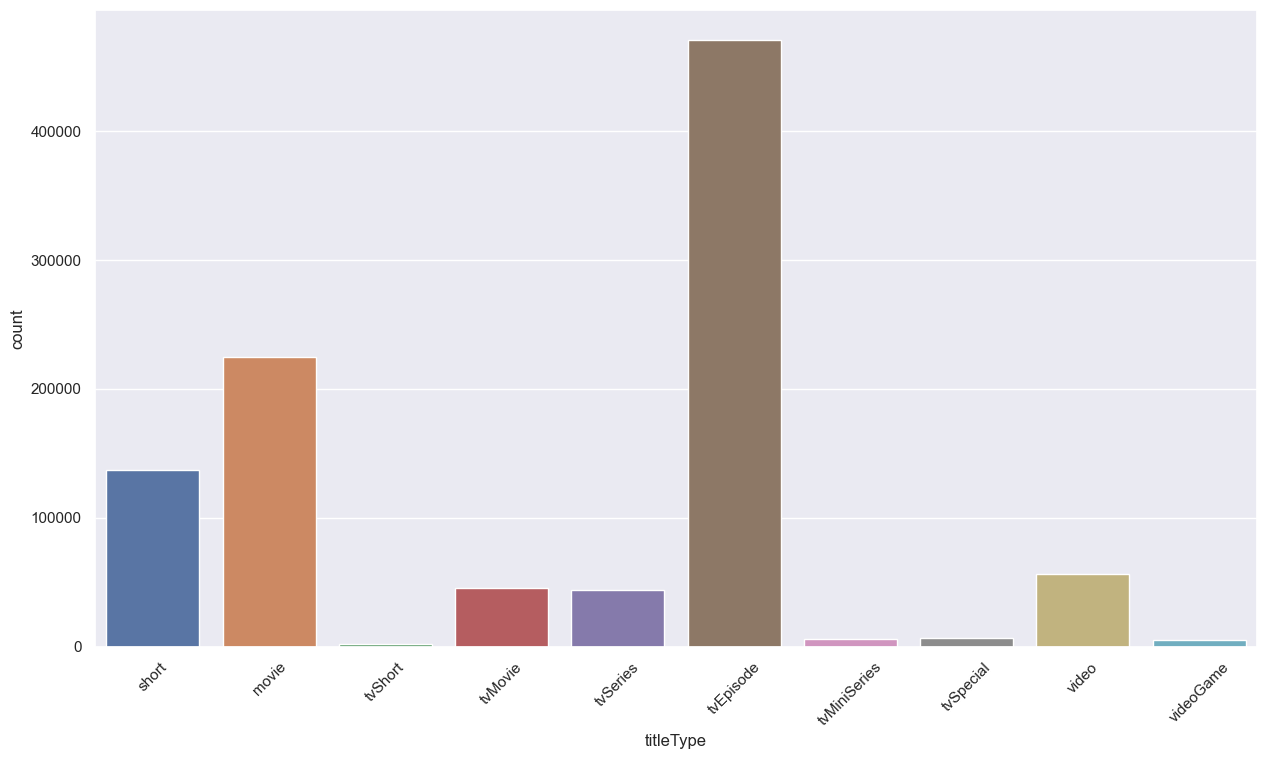

In [231]:
cp = sns.countplot(x=df['titleType'])
# cp.set(xticklabels=[])
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15,8.27)})
plt.show()

### We can observe from the above plot that our dataset contains mostly movies and tvEpisodes

### Let's do our analysis on movies only for now

In [232]:
movies_df = df[df.titleType=="movie"]

In [233]:
movies_df.titleType.unique()

array(['movie'], dtype=object)

### Dropping the titleType column as it's not relevant anymore

In [234]:
movies_df.drop(['titleType'], axis=1, inplace=True)

/var/folders/6g/fytkkjps4bv8kzynbpd83_x80000gn/T/ipykernel_38470/1182493731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df.drop(['titleType'], axis=1, inplace=True)


In [235]:
movies_df.head()

,primaryName,birthYear,deathYear,primaryProfession,language,types,primaryTitle,isAdult,startYear,endYear,runtimeMinutes,genres,category,job,characters,averageRating,numVotes,RegioneName
498,Bai Ling,1966,\N,"actress,producer,writer",\N,\N,Bohemios,0,1905,\N,100,\N,actress,\N,"[""Passenger""]",6.5,6,United States
570,Mary-Louise Parker,1964,\N,"actress,soundtrack,miscellaneous",sr,\N,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",actor,\N,\N,5.6,8,Former Yugoslavia
610,Ariana Richards,1979,\N,actress,\N,imdbDisplay,Robbery Under Arms,0,1907,\N,\N,Drama,director,\N,\N,5.3,7,Hungary
625,John Sayles,1950,\N,"writer,actor,director",\N,imdbDisplay,Hamlet,0,1908,\N,\N,Drama,director,\N,\N,4.3,10,Poland
668,Fred Thompson,1942,2015,actor,\N,\N,Don Quijote,0,1908,\N,\N,Drama,actor,\N,"[""Prof. Barbenfouillis"",""The Moon""]",6.2,1099,France


### Exploring the region column now

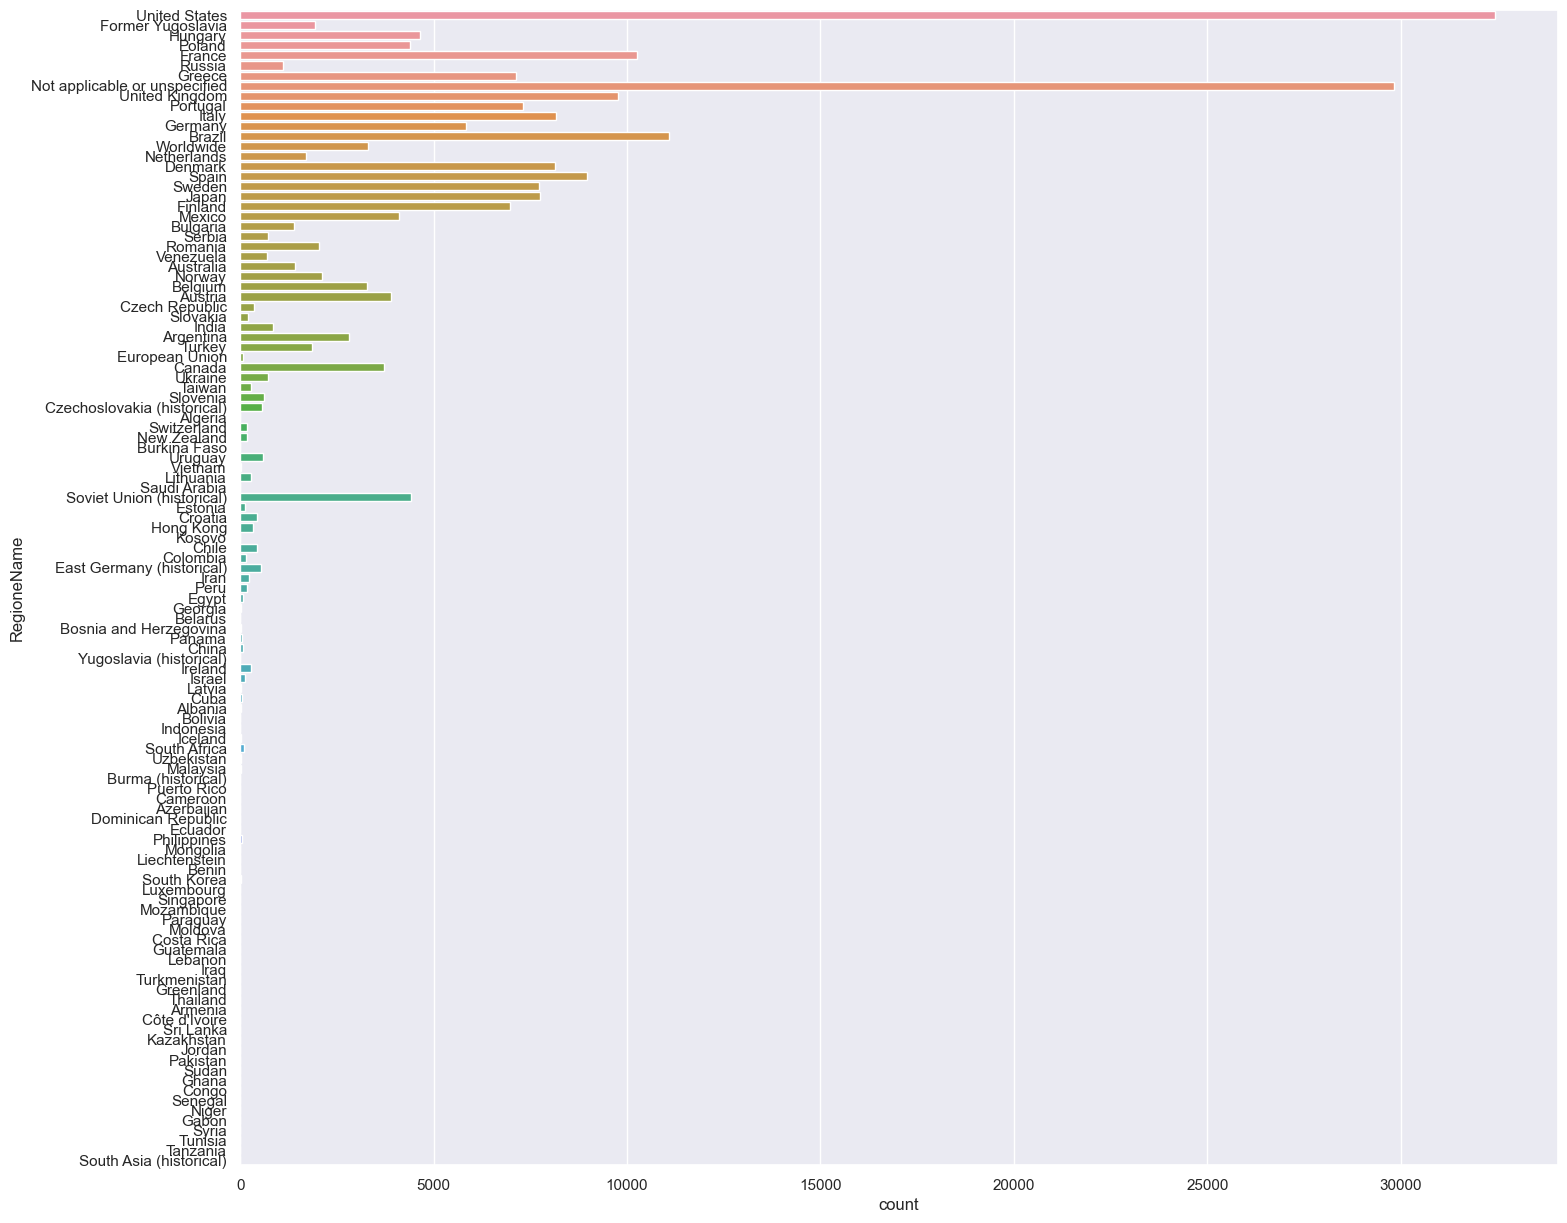

In [243]:
cp = sns.countplot(y=movies_df['RegioneName'])
# cp.set(xticklabels=[])
# plt.yticks(rotation=90)
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

### The most number of movies are from United States, followed by unspecified, Brazil and then United Kingdom.